#Análisis del Problema

El conjunto de datos se centra en predecir la probabilidad de que un paciente experimente un derrame cerebral. Por lo que se pretende clasificar esta probabilidad segpun los atributos proporcionados como entrada.


## Descarga de los archivos de datos:
https://drive.google.com/file/d/1yijPUEpX9mpQlp0dXGeamFKie1V7XXoB/view?usp=sharing

### Autores
* Andrey Marín Chacón
* David González Agüero

#Entendimiento de los datos

El presente conjunto de datos contiene las siguientes características:

* **id**: Este es un identificador único para cada paciente, que permite el seguimiento individual.
* **gender**: Este atributo registra el género del paciente y puede categorizarse como "Masculino," "Femenino," u "Otro."
* **age**: Esto representa la edad del paciente, indicando su edad cronológica.
* **hypertension**:  Este atributo binario tiene un valor de 0 si el paciente no tiene hipertensión y 1 si el paciente tiene hipertensión (presión arterial alta).
* **heart_disease**:  Similar a la hipertensión, este atributo binario tiene un valor de 0 si el paciente no tiene enfermedades cardíacas y 1 si el paciente tiene una enfermedad cardíaca.
* **ever_married**: Registra el estado civil del paciente y puede categorizarse como "No" o "Sí."
* **work_type**: Este atributo describe el tipo de trabajo en el que el paciente está involucrado y puede tener valores como "niños," "Trabajo_gubernamental," "Nunca_trabajó," "Privado," o "Autónomo."
* **Residence_type**: Identifica si la residencia del paciente es en una zona "Rural" o "Urbana."
* **avg_glucose_level**: Este atributo numérico proporciona el nivel promedio de glucosa en la sangre del paciente.
* **bmi**: El índice de masa corporal (IMC) es un indicador numérico del peso corporal de una persona en relación con su altura.
* **smoking_status**: Este atributo registra el estado de fumador del paciente y puede categorizarse como "anteriormente fumador," "nunca fumó," "fuma," o "Desconocido." La categoría "Desconocido" indica que no se dispone de información sobre el estado de fumador de ese paciente.
* **stroke**: Tiene un valor de 1 si el paciente ha experimentado un derrame cerebral y 0 si el paciente no lo ha hecho.

#Exploración de los datos

## Imports

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import joblib

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

##1. Lectura del conjunto de datos

In [ ]:
df = pd.read_csv("sample_data/healthcare-dataset-stroke-data.csv")

##2. Visualización preliminar de la información

In [ ]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Ejecutando el siguiente comando para corroborar si existen o no valores nulos, nos muestra en el resultado que la característica **bmi** contiene valores nulos.

In [ ]:
# Comprobación de si existen valores nulos
is_null = df.isna().any()
is_null[is_null]

bmi    True
dtype: bool

Ahora vamos a ver cuántos valores nulos de la categoría **bmi** hay:

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

En un gráfico de barras vamos a mostrar la cantidad de valores:

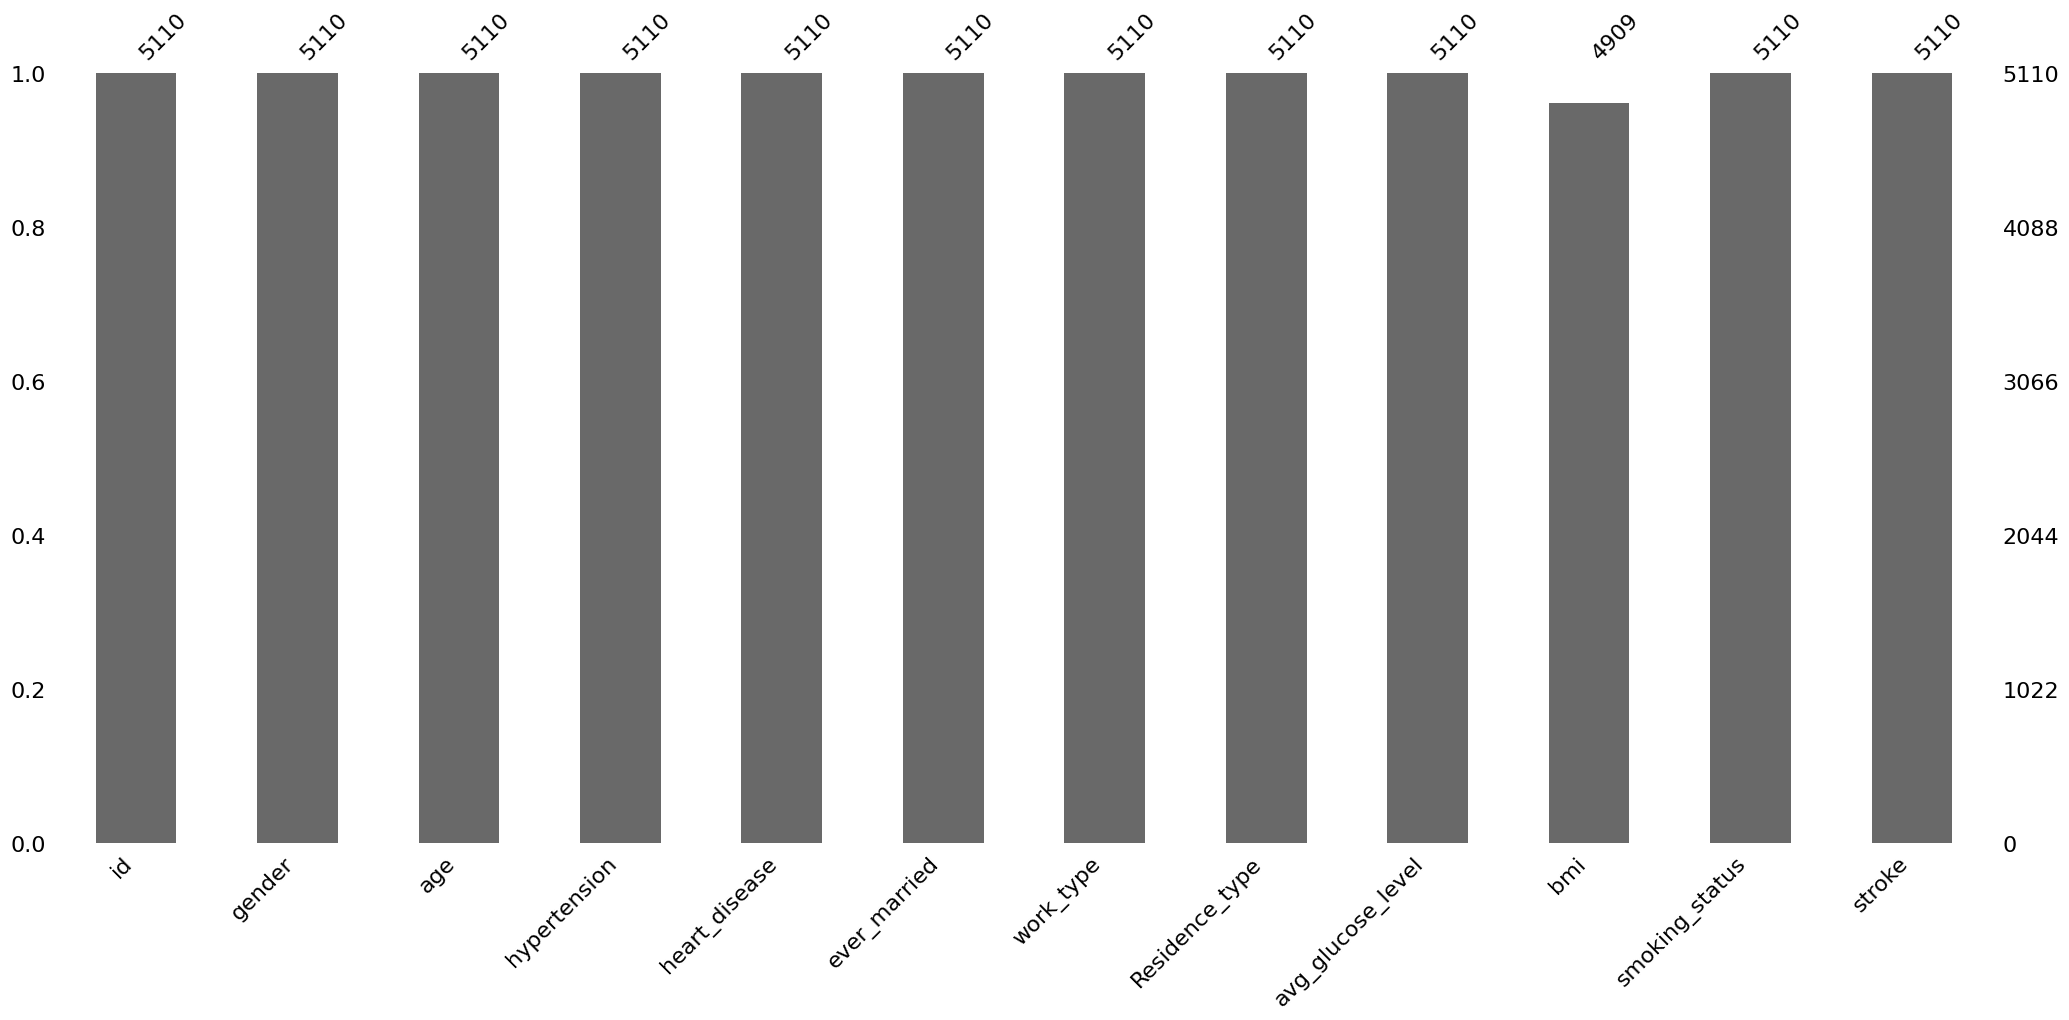

In [ ]:
msno.bar(df)
plt.show()

No existen valores infinitos, nos retorna una lista vacía.

In [ ]:
# Comprobación de la existencia de valores infinitos
is_inf = df.isin([np.inf, -np.inf]).any()
is_inf[is_inf]

Series([], dtype: bool)

In [ ]:
#Rellenamos los valores nulos con la mediana

imputer = SimpleImputer(strategy="median")

In [ ]:
#HAcemos una copia del Df
df_copy = df.copy()

In [ ]:
# La clase imputer no admite valores categoricos, eliminamos los atributos categoricos
df_prep = df_copy.select_dtypes(exclude=['object'])

# Se le proporcionan los atributos numericos para que calcule los valores
imputer.fit(df_prep)

SimpleImputer(strategy='median')

In [ ]:
# Rellenamos los valores nulos
df_prep_nonan = imputer.transform(df_prep)

In [ ]:
df_prep_nonan

array([[9.0460e+03, 6.7000e+01, 0.0000e+00, ..., 2.2869e+02, 3.6600e+01,
        1.0000e+00],
       [5.1676e+04, 6.1000e+01, 0.0000e+00, ..., 2.0221e+02, 2.8100e+01,
        1.0000e+00],
       [3.1112e+04, 8.0000e+01, 0.0000e+00, ..., 1.0592e+02, 3.2500e+01,
        1.0000e+00],
       ...,
       [1.9723e+04, 3.5000e+01, 0.0000e+00, ..., 8.2990e+01, 3.0600e+01,
        0.0000e+00],
       [3.7544e+04, 5.1000e+01, 0.0000e+00, ..., 1.6629e+02, 2.5600e+01,
        0.0000e+00],
       [4.4679e+04, 4.4000e+01, 0.0000e+00, ..., 8.5280e+01, 2.6200e+01,
        0.0000e+00]])

In [ ]:
# Transformamos el resultado a un DataFrame de Pandas
df_copy_2 = pd.DataFrame(df_prep_nonan, columns=df_prep.columns)

In [ ]:
df_copy_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   float64
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   float64
 3   heart_disease      5110 non-null   float64
 4   avg_glucose_level  5110 non-null   float64
 5   bmi                5110 non-null   float64
 6   stroke             5110 non-null   float64
dtypes: float64(7)
memory usage: 279.6 KB


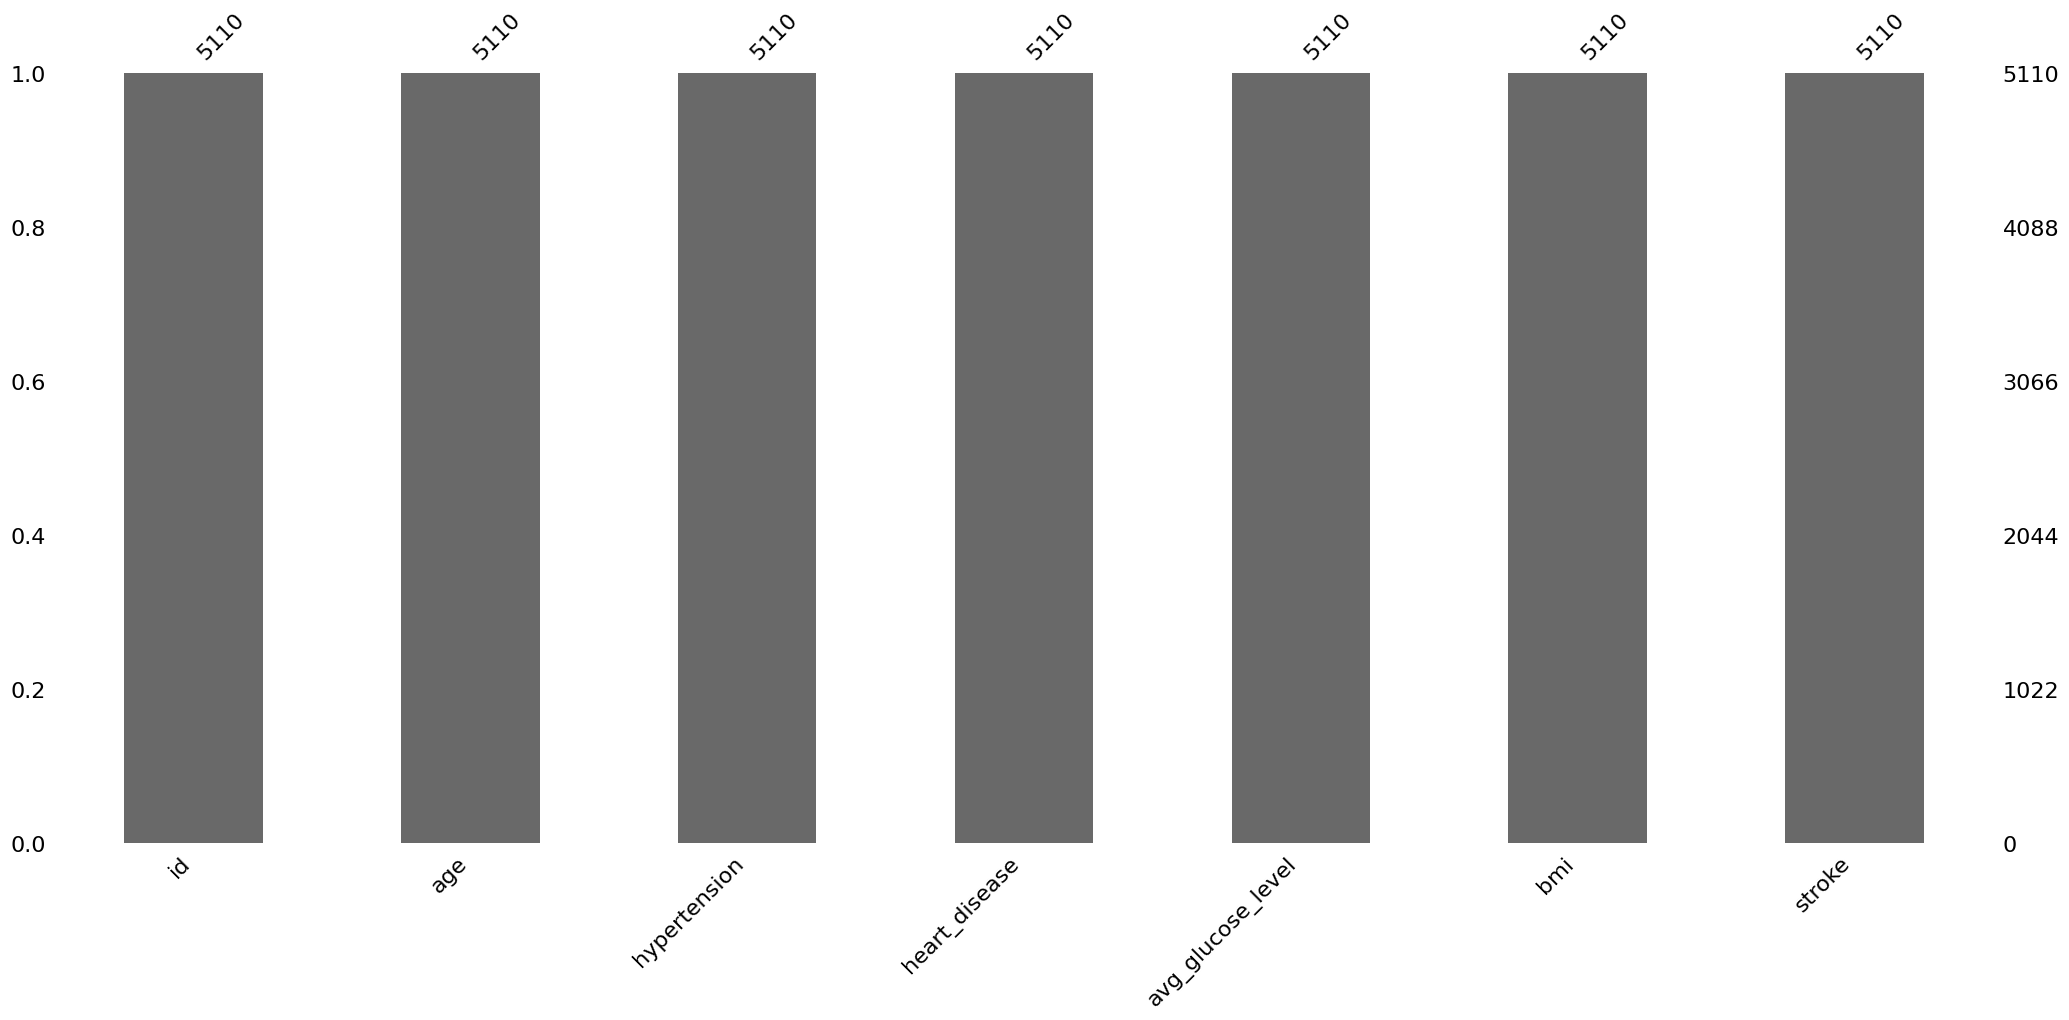

In [ ]:
msno.bar(df_copy_2)
plt.show()

In [ ]:
columnas_a_eliminar = ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
df_copy = df_copy.drop(columnas_a_eliminar, axis=1)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          5110 non-null   object
 1   ever_married    5110 non-null   object
 2   work_type       5110 non-null   object
 3   Residence_type  5110 non-null   object
 4   smoking_status  5110 non-null   object
dtypes: object(5)
memory usage: 199.7+ KB


In [ ]:
# Pegamos todas las caracteristicas al dataframe df_final
df_final = pd.concat([df_copy, df_copy_2], axis=1)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   ever_married       5110 non-null   object 
 2   work_type          5110 non-null   object 
 3   Residence_type     5110 non-null   object 
 4   smoking_status     5110 non-null   object 
 5   id                 5110 non-null   float64
 6   age                5110 non-null   float64
 7   hypertension       5110 non-null   float64
 8   heart_disease      5110 non-null   float64
 9   avg_glucose_level  5110 non-null   float64
 10  bmi                5110 non-null   float64
 11  stroke             5110 non-null   float64
dtypes: float64(7), object(5)
memory usage: 479.2+ KB


In [ ]:
# El ID del cliente es irrelevante, entonces se va a eliminar de nuestro dataFrame
df_final = df_final.drop(['id'], axis=1)

In [ ]:
# Le indicamos que incluya todas las columnas, sin importar que no sean numéricas
df_final.describe(include = 'all')

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110,5110,5110,5110,5110,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
unique,3,2,5,2,4,NaN,NaN,NaN,NaN,NaN,NaN
top,Female,Yes,Private,Urban,never smoked,NaN,NaN,NaN,NaN,NaN,NaN
freq,2994,3353,2925,2596,1892,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,NaN,NaN,NaN,NaN,NaN,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,NaN,NaN,NaN,NaN,NaN,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000


<Axes: >

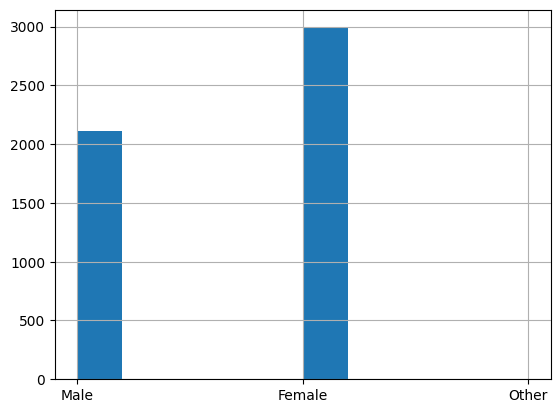

In [ ]:
# Mostrar los valores de la característica como un histograma

df_final["gender"].hist()

<Axes: >

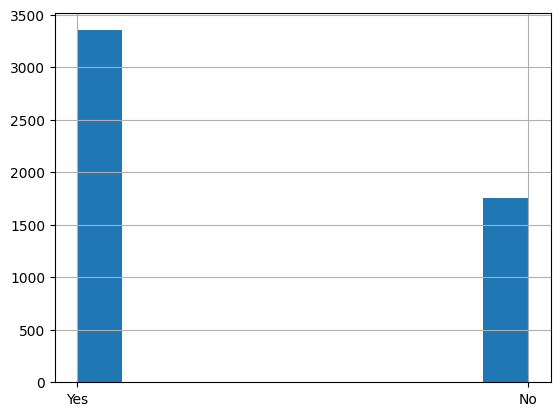

In [ ]:
# Mostrar los valores de la característica como un histograma

df_final["ever_married"].hist()

<Axes: >

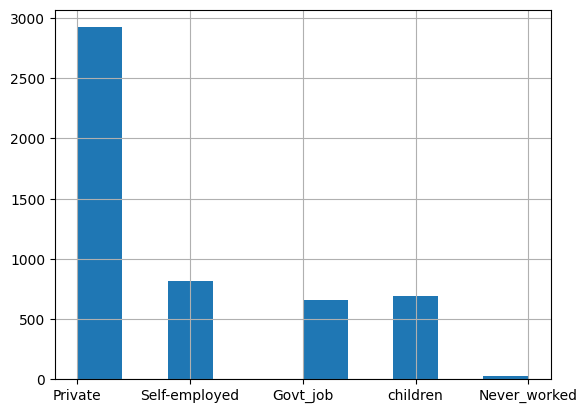

In [ ]:
# Mostrar los valores de la característica como un histograma

df_final["work_type"].hist()

<Axes: >

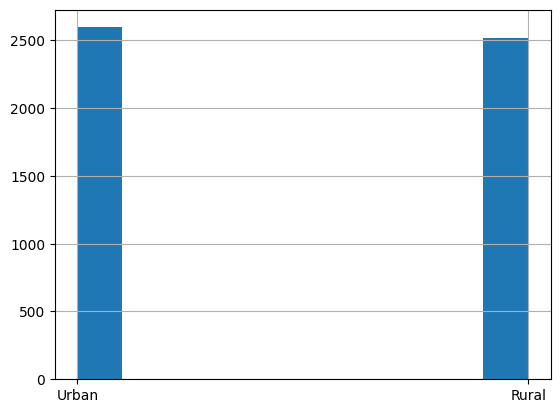

In [ ]:
# Mostrar los valores de la característica como un histograma

df_final["Residence_type"].hist()

<Axes: >

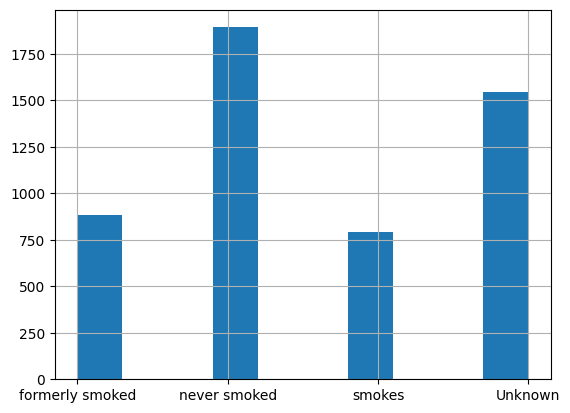

In [ ]:
# Mostrar los valores de la característica como un histograma

df_final["smoking_status"].hist()

<Axes: >

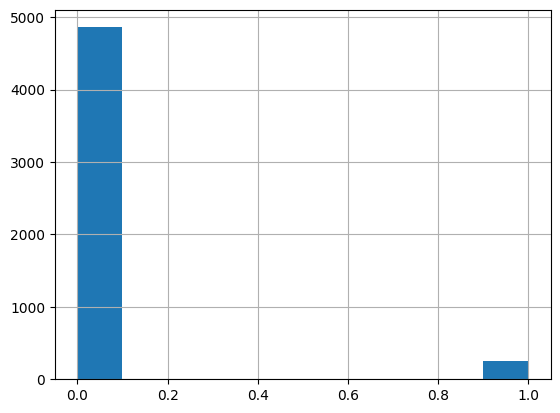

In [ ]:
# Mostrar los valores de la característica como un histograma

df_final["stroke"].hist()

<ipython-input-29-e033b7ab8ead>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final[df_final['stroke'] == 0]['bmi'],color='blue')
<ipython-input-29-e033b7ab8ead>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final[df_final['stroke'] == 1]['bmi'],color='red')


(10.0, 100.0)

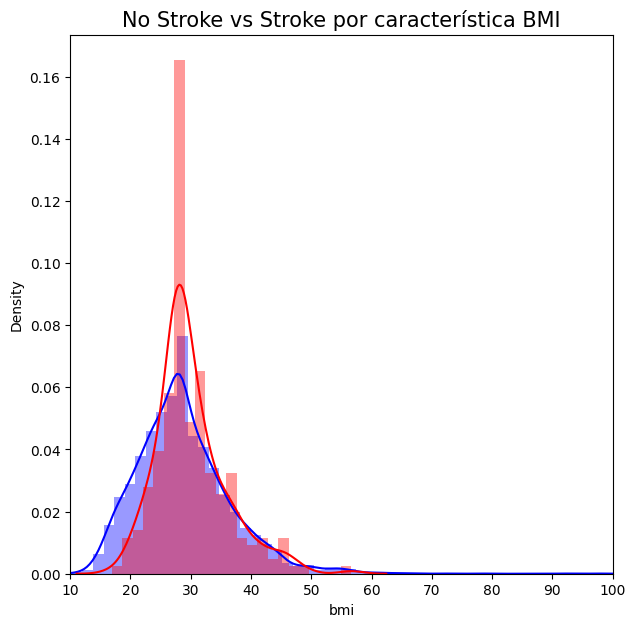

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df_final[df_final['stroke'] == 0]['bmi'],color='blue')
sns.distplot(df_final[df_final['stroke'] == 1]['bmi'],color='red')

plt.title('No Stroke vs Stroke por característica BMI',fontsize=15)
plt.xlim([10,100])

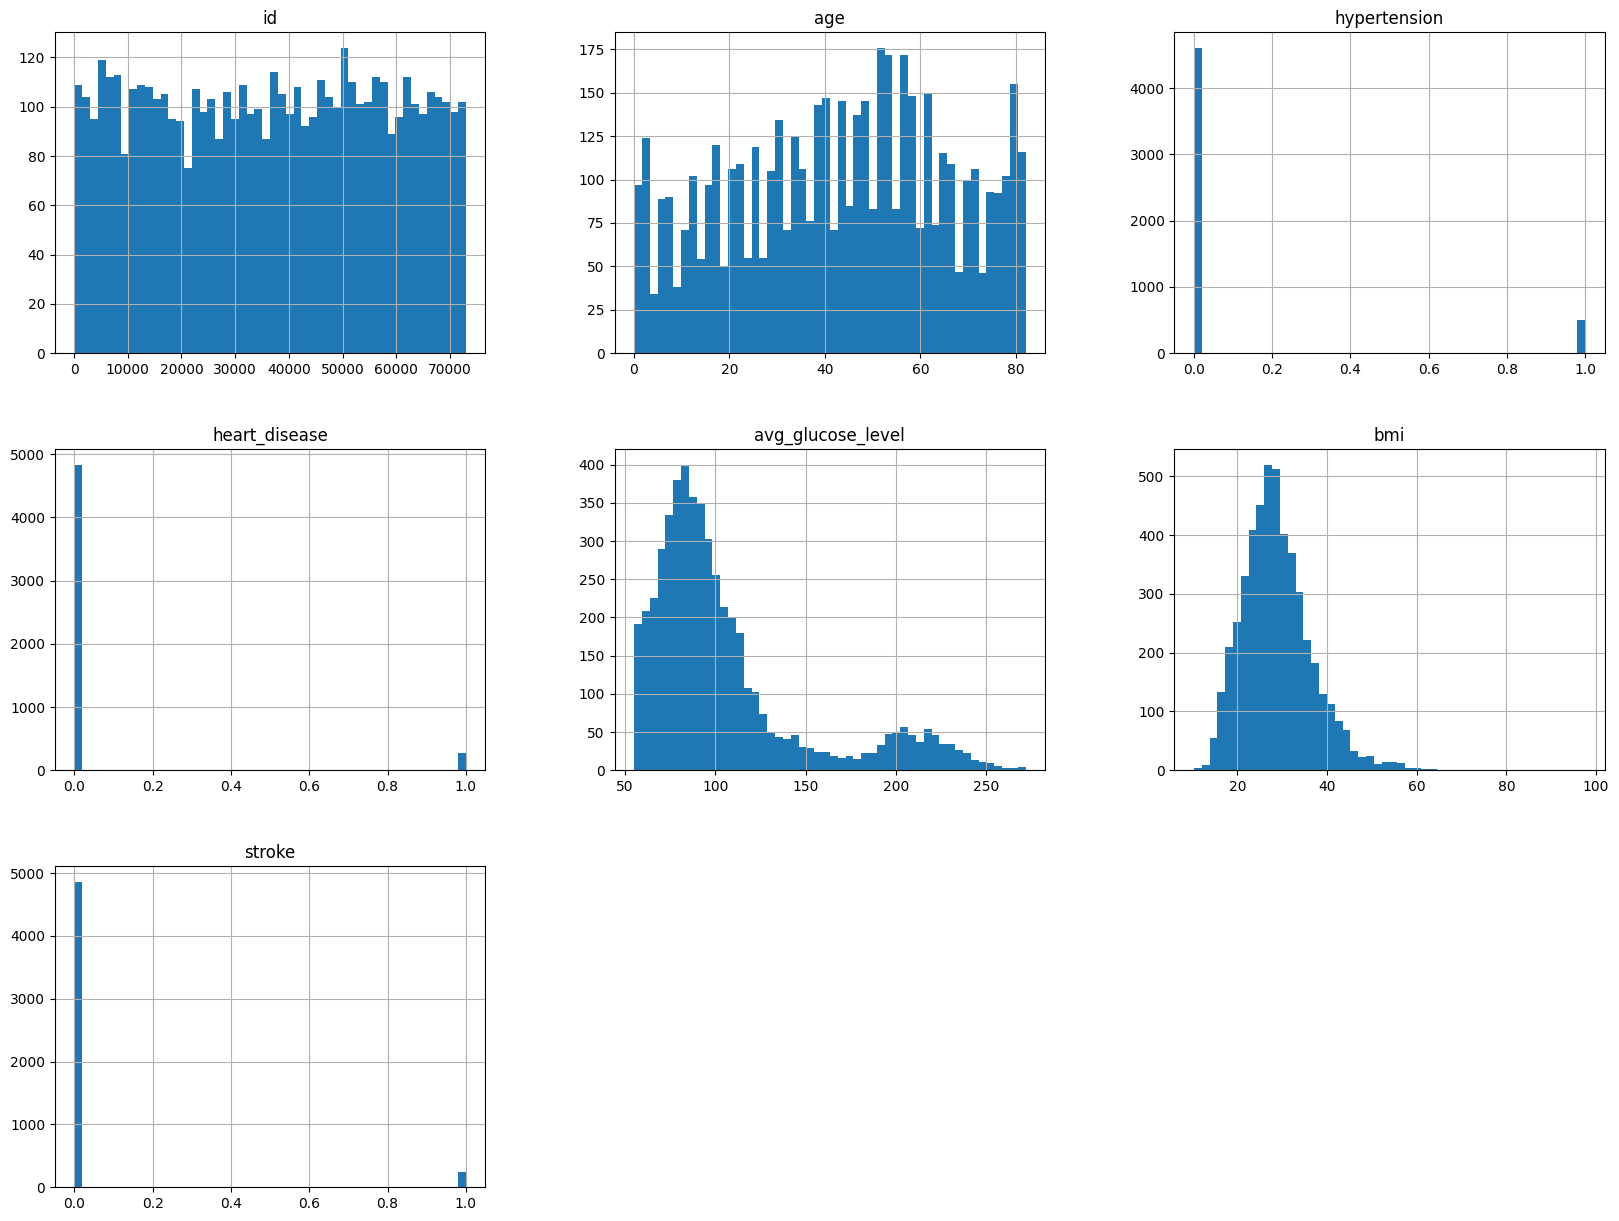

In [ ]:
# Representar gráficamente la distribución de los atributos
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
le = LabelEncoder()
df_final['gender'] = le.fit_transform(df_final['gender'])
df_final['ever_married'] = le.fit_transform(df_final['ever_married'])
df_final['work_type'] = le.fit_transform(df_final['work_type'])
df_final['Residence_type'] = le.fit_transform(df_final['Residence_type'])
df_final['smoking_status'] = le.fit_transform(df_final['smoking_status'])

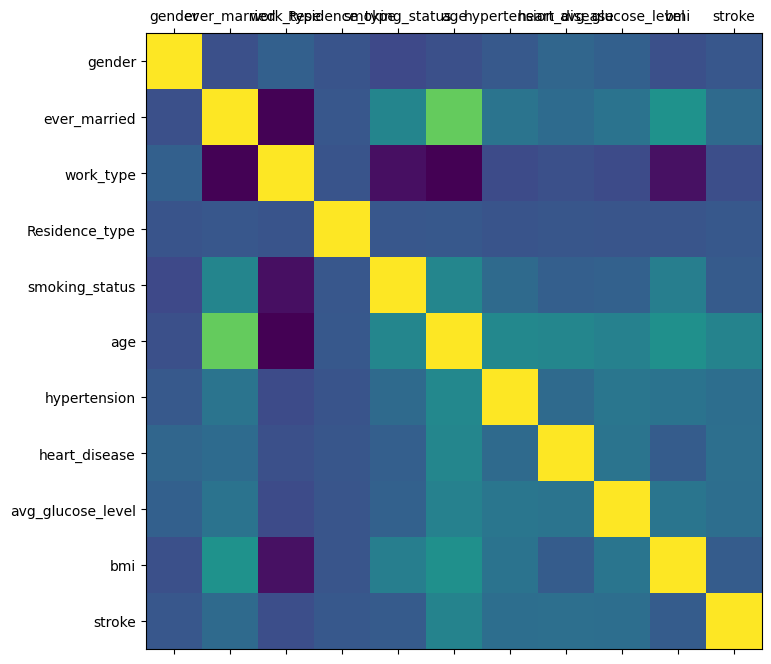

In [ ]:
# Representar gráficamente la matriz de correlación
corr = df_final.corr()
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

In [ ]:
# Mostrar la correlación entre los atributos del conjunto de datos
corr_matrix = df_final.corr()
corr_matrix["stroke"].sort_values(ascending=False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
ever_married         0.108340
bmi                  0.036110
smoking_status       0.028123
Residence_type       0.015458
gender               0.008929
work_type           -0.032316
Name: stroke, dtype: float64

##3. Division del conjunto de datos

In [ ]:
# División del conjunto de datos 80/20 ya que son poquitos datos
train_set, test_set = train_test_split(df_final, test_size=0.2, random_state=42)

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4088 entries, 802 to 860
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4088 non-null   int64  
 1   ever_married       4088 non-null   int64  
 2   work_type          4088 non-null   int64  
 3   Residence_type     4088 non-null   int64  
 4   smoking_status     4088 non-null   int64  
 5   age                4088 non-null   float64
 6   hypertension       4088 non-null   float64
 7   heart_disease      4088 non-null   float64
 8   avg_glucose_level  4088 non-null   float64
 9   bmi                4088 non-null   float64
 10  stroke             4088 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 383.2 KB


In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 4688 to 2902
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1022 non-null   int64  
 1   ever_married       1022 non-null   int64  
 2   work_type          1022 non-null   int64  
 3   Residence_type     1022 non-null   int64  
 4   smoking_status     1022 non-null   int64  
 5   age                1022 non-null   float64
 6   hypertension       1022 non-null   float64
 7   heart_disease      1022 non-null   float64
 8   avg_glucose_level  1022 non-null   float64
 9   bmi                1022 non-null   float64
 10  stroke             1022 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 95.8 KB


##4. Preparación del conjunto de datos

In [ ]:
# Separamos las características de entrada de la característica de salida
X_train = train_set.drop("stroke", axis=1)
y_train = train_set["stroke"].copy()

X_test = test_set.drop("stroke", axis=1)
y_test = test_set["stroke"].copy()

In [ ]:
X_train.shape

(4088, 10)

In [ ]:
X_test.shape

(1022, 10)

In [ ]:
y_train.shape

(4088,)

In [ ]:
y_test.shape

(1022,)

In [ ]:
X_train.head(50)

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi
802,1,1,3,0,1,79.0,0.0,0.0,112.64,28.5
3927,0,1,2,1,0,62.0,0.0,0.0,88.32,36.3
2337,0,0,2,0,2,21.0,0.0,0.0,59.52,33.7
3910,1,1,0,1,1,31.0,0.0,0.0,65.70,30.4
1886,0,0,2,0,2,31.0,0.0,0.0,59.63,19.9
1018,0,1,3,0,0,63.0,0.0,0.0,85.60,25.9
3905,1,1,2,1,1,78.0,0.0,0.0,208.85,24.4
1675,1,1,2,1,2,58.0,1.0,0.0,200.16,33.1
517,0,1,3,0,1,68.0,0.0,0.0,104.38,40.8
3362,1,1,2,0,0,56.0,0.0,0.0,96.84,30.2


#Arbol Decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

MAX_DEPTH = 20


clf_tree = DecisionTreeClassifier(max_depth=MAX_DEPTH, random_state=42)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=42)

In [ ]:
# Predecimos con el conjunto de datos de validación
y_pred = clf_tree.predict(X_test)

In [ ]:
# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)

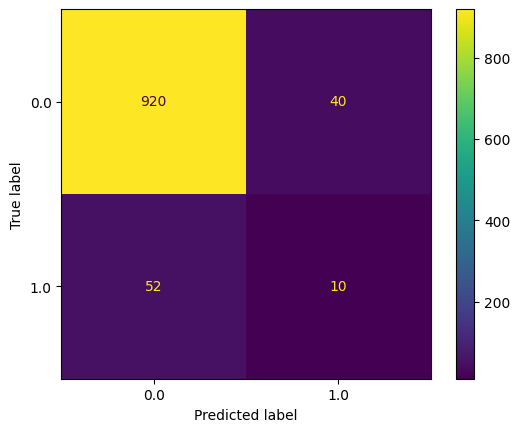

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=clf_tree.classes_)
cm_display.plot()

###Precisión

In [ ]:
# Intuición sobre falsos positivos que predice el modelo
print("Precisión:", precision_score(y_test, y_pred, pos_label=0.0))

Precisión: 0.9465020576131687


### Recall

In [ ]:


print("Recall:", recall_score(y_test, y_pred, pos_label=0.0))

Recall: 0.9583333333333334


### F1 Score

In [ ]:
print("F1 score:", f1_score(y_test, y_pred, pos_label=0.0))

F1 score: 0.9523809523809524


In [ ]:
# Salvar el modelo en archivo .pkl
joblib.dump(clf_tree, "05AccidenteCerebnrovascular.pkl")

['05AccidenteCerebnrovascular.pkl']

In [ ]:
# Cargar modelo
#svmCargado = joblib.load("05AccidenteCerebnrovascular.pkl")

#Conclusión
Podemos ver que el algoritmo de árbol de decisión para este conjunto de datos presenta una Precisión del 94%, también su Recall es de 95% al igual que si F1 Score que es de 95%. Podemos ver por medio de la matriz de decisión que predice bastante bien para los casos en donde no se tiene un ataque cerebrovascular, pero para los casos en los que sí se tiene no lo hace tan bien, esto puede ser debido a la gran diferencia entre los datos de salida en donde se tenía más de 4000 datos que tenían la etiqueta de No y menor de 500 datos en los que se tenía la etiqueta de sí.